In [1]:
%matplotlib notebook

In [2]:
from pyeels import *
from pyeels.atom import *
from pyeels.tightbinding import WursiteSP3
import hyperspy.api as hspy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ZnO = Crystal(lattice = np.array([
        [ np.sqrt(3)/2, -0.5, 0.0],
        [ 0.0, 1.0,  0.0],
        [ 0.0, 0.0, 1.65]])*3.28)

ZnO.add_atom(Oxygen([0,0,0]))
ZnO.add_atom(Oxygen([2/3, 1/3, 1/2]))
ZnO.add_atom(Zinc([2/3, 1/3, 1/8]))
ZnO.add_atom(Zinc([0.0, 0.0, 5/8]))

'Placed atom at [ 0.     0.     0.625]'

In [4]:
# Tight Binding Model
ZnO_tb = WursiteSP3(ZnO)

Vss   = -6.043
Vxx   =  7.157
Vxy   = 10.578
Vsapc =  4.703
Vpasc =  8.634

ZnO_tb.set_hopping_parameters(Vss, Vxx, Vxy, Vsapc, Vpasc)

<IPython.core.display.Javascript object>


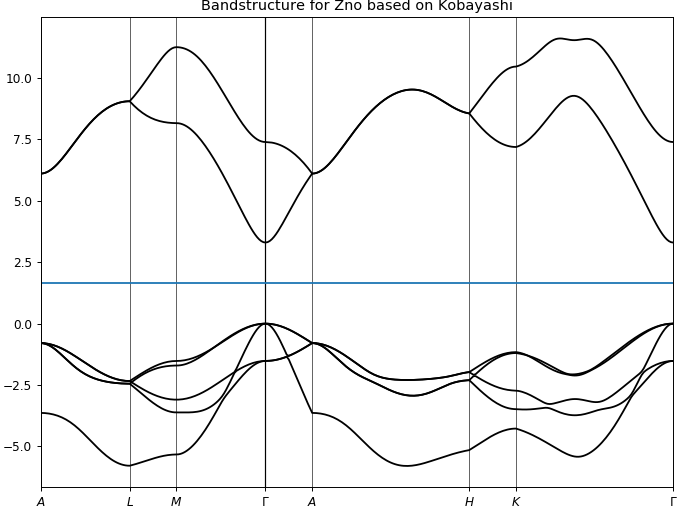

In [16]:
ZnO_tb.bandstructure(bands=(3,10), color="black")
plt.axhline(1.65)
plt.show()

In [29]:
ZnO_tb.setGrid(mesh=75)
ZnO_tb.calculate(eig_vectors=False)

In [30]:
eels = EELS(ZnO)

eels.setMeta(name="ZnO multithread test", authors="Sindre R. Bilden", title="Test title", notes="First run with ZnO")

eels.setDiffractionZone()

In [ ]:
s = eels.multiCalculateScatteringCrossSection(energyBins=np.linspace(2,5,60),bands=(3,10),fermiEnergy=1.65,temperature=0)

VBox(children=(HBox(children=(Label(value='q_z', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=34), BoundedFloatText(value=-0.580486447448225, continuous_update=True, description='value', max=0.580486447448225, min=-0.580486447448225, step=0.03414626161460147), Label(value='AA-1', layout=Layout(width='5%')))), HBox(children=(Label(value='q_y', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=34), BoundedFloatText(value=-0.9578026382895712, continuous_update=True, description='value', max=0.9578026382895712, min=-0.9578026382895712, step=0.05634133166409243), Label(value='AA-1', layout=Layout(width='5%')))), HBox(children=(Label(value='q_x', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=34), BoundedFloatText(value=-1.1059752220940353, continuous_update=True, description='value', max=1.1059752220940353, min=-1.1059752220940353, step=0.06505736600553148), Label(value='AA-1', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

<IPython.core.display.Javascript object>


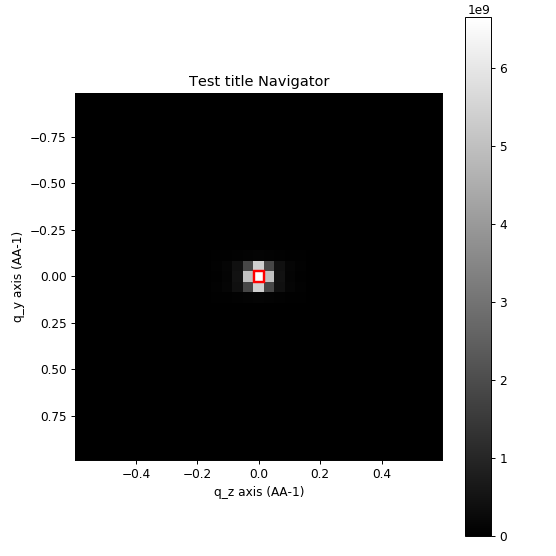

<IPython.core.display.Javascript object>


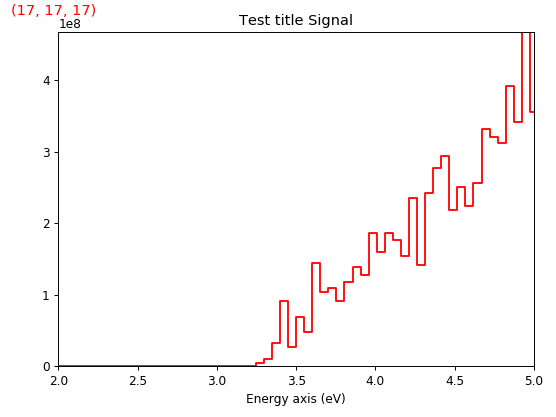

/home/sindrerb/anaconda3/envs/hySpy2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/sindrerb/anaconda3/envs/hySpy2/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


In [28]:
s.plot()